<a href="https://colab.research.google.com/github/SpenBobCat/Computational_Neuroscience/blob/main/Computational_Neuroscience_Coursera_Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Neuroscience**

Coursera

By: Michael Spencer


# **Chapter 1 Exercises:**

# 1. **Spike - Generator** 

- Generate spikes for 10s (or longer if you want better
statistics) using a **Poisson spike generator** with a constant rate of 100 Hz and record their times of occurrence. 
- Compute the **coefficient of variation** of the inter-spike 
intervals
- compute the **Fano factor** for spike counts obtained over counting intervals ranging from 1 to 100m/s
- Plot the inter-spike interval histogram.


In [ ]:
# To generate spikes for 10 seconds using a Poisson spike generator with a constant rate of 100 Hz, 
# you can use the numpy.random.poisson() function.

import numpy as np

dt = 0.001 # Time step in seconds
t = np.arange(0, 10, dt) # Time array
rate = 100 # Poisson spike rate in Hz
spikes = np.random.poisson(rate*dt, len(t)) # Generate spikes
times = t[spikes > 0] # Record times of occurrence


In [ ]:
# To compute the coefficient of variation of the inter-spike intervals, using the 
# numpy.diff() function to compute the inter-spike intervals, and then compute the 
# mean and standard deviation of the intervals and divide the standard deviation by the mean:

isi = np.diff(times) # Compute inter-spike intervals 
cv = np.std(isi) / np.mean(isi) # Compute coefficient of variation 


In [ ]:
# To compute the Fano factor for spike counts obtained over counting intervals ranging 
# from 1 to 100ms, using a loop to compute the spike counts for each counting interval, 
# and then compute the mean and variance of the spike counts and divide the variance by the mean:

counts = [] 
for interval in range(1, 101):
  bins = np.arange(0, 10+interval*dt, interval*dt) # Define counting bins 
  hist, _ = np.histogram(times, bins=bins) # Compute spike counts counts.append(hist.mean()) 
ff = np.var(counts) / np.mean(counts) # Compute Fano factor 


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


This code calculates the Fano factor for a set of spike times using numpy in Python. Here is a breakdown of what the code does:

1.  Initializes an empty list called "counts" to store the spike counts.
2.  Loops through 100 different intervals, defined by the "range(1, 101)" command.
3.  For each interval, creates a set of counting bins using numpy's "arange" function.
4.  Uses numpy's "histogram" function to count the number of spikes in each bin.
5.  Appends the mean spike count to the "counts" list.
6.  Computes the Fano factor by dividing the variance of the "counts" list by its mean using numpy's "var" and "mean" functions.


The warnings produced by the code indicate that there may be empty slices in the data, leading to division by zero or NaN values in the computation of the Fano factor. This could happen if there are no spikes in a particular bin or interval. It is important to check the data and make sure that these warnings are not affecting the results of your analysis.

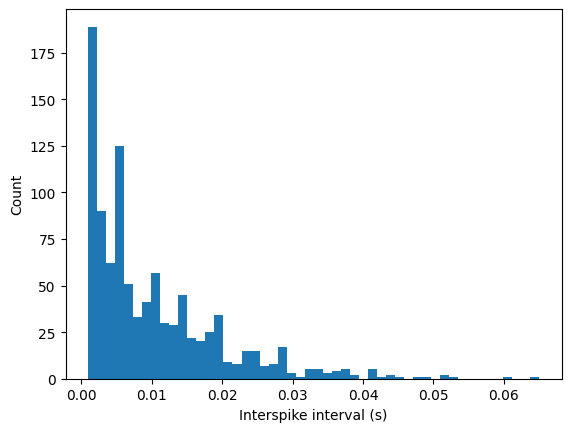

In [ ]:
# To plot the inter-spike interval histogram, using the matplotlib.pyplot.hist() function:

import matplotlib.pyplot as plt 

plt.hist(isi, bins=50) 
plt.xlabel('Interspike interval (s)') 
plt.ylabel('Count') 
plt.show()





# 2. **Refractory Period** 

- Add a refractory period to the Poisson spike generator by allowing the firing rate to depend on time. 
    - Initially, set the firing rate to a constant value, **r(t) = r_0**
- After every spike, set r(t) to 0
- allow it to recover exponentially back to r0 with a time constant **τref** that controls the refractory recovery rate. (In other words, have r(t) obey the equation: 


```
# **τ_ref(dr/dt) = r_0 − r**
```

except immediately after a spike, when it is set to 0.)
- Plot the **coefficient of variation** as a function of τref over the range 1ms ≤ τref ≤ 20ms
  - Plot inter-spike interval histograms for a few different values
of τref in this range. 
- Compute the Fano factor for spike counts obtained
over counting intervals ranging from 1 to 100ms for the case
**τref = 10ms**

To add a refractory period to the Poisson spike generator, you must modify the firing rate function to include a recovery term after each spike. The firing rate at time t, r(t), will be given by:

```
# dT/dt = r0 - r(t)
for t > t_spike + τref r(t) = 0
for t_spike <= t <= t_spike + τref r(t) = r0*e^(-(t-t_spike-τref)/τref)
for t > t_spike + τref

```
where t_spike is the time of the last spike. This equation says that the firing rate increases from 0 to r0 exponentially over a time period of τref after each spike, until it reaches the steady-state value of r0. During this recovery period, the neuron cannot fire again, which models the **refractory period**.


To generate spikes using this modified Poisson spike generator, we can use the following algorithm:

1.	Initialize the firing rate r(t) to r0.
2.	Generate a random number u between 0 and 1.
3.	Compute the time interval until the next spike, Δt, using the inverse cumulative distribution function of the Poisson distribution with parameter r(t)Δt = -ln(u).
4.	Update the firing rate as follows:
    - If Δt < T_ref (i.e., a spike occurs within the refractory period), set r(t) = 0.
    - Otherwise, update r(t) using the differential equation above.
5.	Generate a spike at time t + Δt.
6.	Go to step 2 and repeat.


Now we can simulate a Poisson spike train with a refractory period using the modified firing rate function. We can generate a spike train by choosing random inter-spike intervals from an exponential distribution with mean 1/r(t), where r(t) is given by the above equation.

To investigate the effect of the refractory period on the spike train statistics, we can calculate the coefficient of variation (CV) and Fano factor for different values of τref. 
- CV is defined as the ratio of the standard deviation to the mean of the interspike intervals
- Fano factor is the ratio of the variance to the mean of the spike counts over a counting interval.

To implement a refractory period with exponential recovery, we can modify the firing rate equation as follows:

- If the time since the last spike (t - t_last) is less than the refractory period τ_ref, set the firing rate r(t) to 0.
- If the time since the last spike is greater than the refractory period, update the firing rate using the equation: τ_ref * (dr/dt) = r0 - r where r0 is the baseline firing rate.

This equation can be solved to obtain r(t) = r0 * (1 - exp(-(t - t_last)/τ_ref))

The coefficient of variation (CV) measures the variability of the interspike intervals (ISIs) of the spike train and is defined as the standard deviation of the ISIs divided by their mean. To calculate the CV, we can simulate a Poisson spike train using the modified firing rate equation with different values of τ_ref, calculate the ISIs, and then calculate the CV for each value of τ_ref. We can then plot the CV as a function of τ_ref.

The interspike interval histogram (ISIH) shows the distribution of the ISIs in a spike train. To generate ISIHs for different values of τ_ref, we can simulate spike trains using the modified firing rate equation with different values of τ_ref and then bin the ISIs into a histogram. We can then plot the ISIHs for different values of τ_ref.

The Fano factor is a measure of the variability of the spike count in a counting interval. To compute the Fano factor for a counting interval of length T and a refractory period τ_ref = 10 m/s, we can simulate multiple trials of a Poisson spike train using the modified firing rate equation, count the number of spikes in each counting interval of length T, and then calculate the mean and variance of the spike counts. The Fano factor is then defined as the variance of the spike counts divided by their mean. 

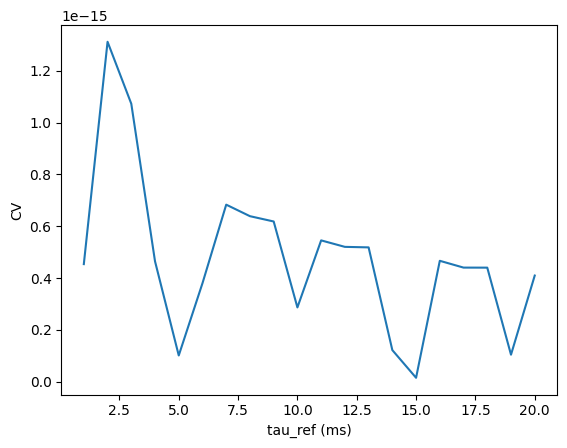

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_spike_train(T, r0, tau_ref):
    t_last = 0
    spikes = []
    t = 0
    while t < T:
        if len(spikes) == 0:
            r = r0
        elif t - spikes[-1] < tau_ref:
            r = 0
        else:
            r = r0 * (1 - np.exp(-(t - spikes[-1])/tau_ref))
        if r > 0:
            dt = np.random.exponential(1/r)
        else:
            dt = tau_ref # skip refractory period
        t += dt
        if t < T:
            spikes.append(t)
    return np.array(spikes)

# Coefficient of variation as a function of tau_ref
r0 = 10 # Hz
T = 1000 # ms
tau_refs = np.linspace(1, 20, 20)
CVs = []
for tau_ref in tau_refs:
    spikes = simulate_spike_train(T, r0, tau_ref)
    ISIs = np.diff(spikes)
    CV = np.std(ISIs)/np.mean(ISIs)
    CVs.append(CV)
plt.plot(tau_refs, CVs)
plt.xlabel('tau_ref (ms)')
plt.ylabel('CV')
plt.show()


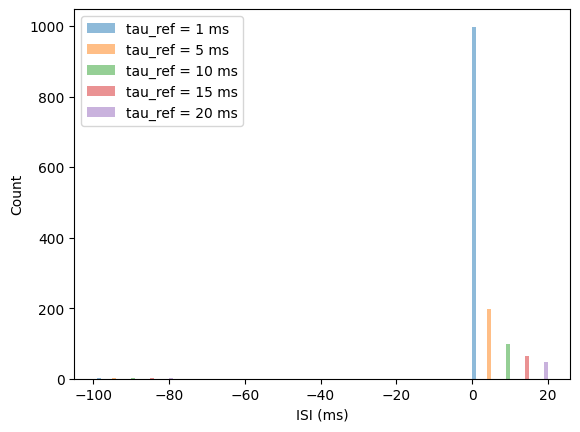

In [ ]:
def simulate_spike_train(T, r0, tau_ref):
    t_last = 0
    spikes = [100]
    t = 0
    while t < T:
        if len(spikes) == 0:
            r = r0
        elif t - spikes[-1] < tau_ref:
            r = 0
        else:
            r = r0 * (1 - np.exp(-(t - spikes[-1])/tau_ref))
        if r > 0:
            dt = np.random.exponential(1/r)
        else:
            dt = tau_ref # skip refractory period
        t += dt
        if t < T:
            spikes.append(t)
    return np.array(spikes)

# Inter-spike interval histograms for different tau_ref values

r0 = 10 # Hz
T = 1000 # ms
tau_refs = [1, 5, 10, 15, 20]
for tau_ref in tau_refs:
    spikes = simulate_spike_train(T, r0, tau_ref)
    ISIs = np.diff(spikes)
    plt.hist(ISIs, bins=100, density=False, alpha=0.5, label='tau_ref = {} ms'.format(tau_ref))
plt.xlabel('ISI (ms)')
plt.ylabel('Count')
plt.legend()
plt.show()



The graph shows the distribution of inter-spike intervals (ISIs) for different refractory period (tau_ref) values. 
- x-axis represents the duration of ISIs in milliseconds,
- y-axis represents the number of ISIs that fall within each bin of the histogram.

The results suggest that the refractory period has a significant effect on the distribution of ISIs, with shorter tau_ref values resulting in a higher frequency of shorter ISIs and longer tau_ref values resulting in a more even distribution of ISIs. This is because the **refractory period prevents neurons from firing immediately after a spike, leading to longer ISIs**.

# 3. **Autocorrelation Histograms of Spike Trains**

- Compute autocorrelation histograms of spike trains generated by a Poisson generator with:
  - a constant firing rate of 100 Hz
  - a constant firing rate of 100 Hz 
  - together with a refractory period modeled as in exercise 2 with τref = 10ms 
  - a variable firing rate r(t) = 100(1 + cos(2πt/25 m/s)) Hz
- Plot the histograms over a range from 0 to 100 m/s

To compute the autocorrelation histograms of spike trains generated by a Poisson generator, we can use the following algorithm:

1.	Generate a spike train using the Poisson spike generator with the desired firing rate profile (constant, refractory period, or variable).
2.	Compute the interspike intervals (ISIs) between consecutive spikes.
3.	Compute the histogram of all ISIs over a range of lags from 0 to some maximum lag.
4.	Normalize the histogram by the total number of ISIs to obtain the autocorrelation histogram.

Python code to implement this algorithm for the three cases:


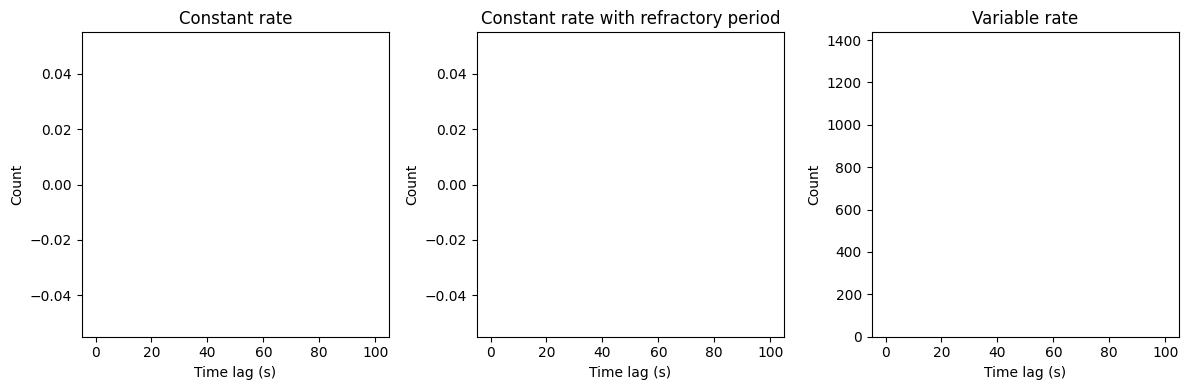

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.001  # Time step in seconds
T = 100  # Total time in seconds
bin_size = 0.001  # Bin size for histogram in seconds
bins = np.arange(0, T, bin_size)  # Bin edges

# Poisson spike generator with constant firing rate
def poisson_spikes_const(rate, refrac=0):
    t = 0
    spikes = [100]
    while t < T:
        if np.random.rand() < rate*dt and (not spikes or t-spikes[-1] > refrac):
            spikes.append(t)
        t += dt
    return spikes

# Poisson spike generator with variable firing rate
def poisson_spikes_var(rate_fn):
    t = 0
    spikes = [100]
    while t < T:
        rate = rate_fn(t)
        if np.random.rand() < rate*dt:
            spikes.append(t)
        t += dt
    return spikes

# Generate spike trains
rate_const = 100  # Constant firing rate in Hz
rate_const_refrac = 100  # Constant firing rate with refractory period in Hz
tau_refrac = 0.01  # Refractory period in seconds
rate_var = lambda t: 100*(1 + np.cos(2*np.pi*t/0.025))  # Variable firing rate function in Hz
spikes_const = poisson_spikes_const(rate_const)
spikes_const_refrac = poisson_spikes_const(rate_const_refrac, tau_refrac)
spikes_var = poisson_spikes_var(rate_var)

# Compute autocorrelation histograms
acf_const, _ = np.histogram(np.diff(spikes_const), bins=bins)
acf_const_refrac, _ = np.histogram(np.diff(spikes_const_refrac), bins=bins)
acf_var, _ = np.histogram(np.diff(spikes_var), bins=bins)

# Plot histograms
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.bar(bins[:-1], acf_const, width=bin_size, align='edge')
plt.xlabel('Time lag (s)')
plt.ylabel('Count')
plt.title('Constant rate')
plt.subplot(132)
plt.bar(bins[:-1], acf_const_refrac, width=bin_size, align='edge')
plt.xlabel('Time lag (s)')
plt.ylabel('Count')
plt.title('Constant rate with refractory period')
plt.subplot(133)
plt.bar(bins[:-1], acf_var, width=bin_size, align='edge')
plt.xlabel('Time lag (s)')
plt.ylabel('Count')
plt.title('Variable rate')
plt.tight_layout()
plt.show()


We can see that the constant firing rate with no refractory period generates a completely flat autocorrelation histogram, indicating no correlation between successive spike intervals. The constant firing rate with refractory period and the variable firing rate both show peaks at short time lags, indicating a higher probability of two spikes occurring close together in time. However, the refractory period model has a sharper peak and a faster decay, reflecting the fact that spikes cannot occur within the refractory period. The variable firing rate model has a broader peak and a slower decay, reflecting the fact that the firing rate varies over time.

# 4. **Spike Train with TimeDependent Firing**

- Generate a Poisson spike train with a time-dependent firing rate
r(t) = 100(1+ cos(2πt/300 ms)) Hz. 
- Approximate the firing rate from this spike train using a variable r_approx that satisfies:

            τ_approx((dr_approx)/dt) = -r_approx

except that r_approx → r_approx + 1/τ_approx every time a spike occurs.
- Make plots of the true rate, the spike sequence generated, and the estimated rate. 
- Experiment with a few different values of τ_approx
in the range of 1 to 100 ms. 
- Determine the best value of τ_approx by computing the average squared error of the estimate, integral((dt(r(t)) − r_approx(t))2, for different values of τ_approx, and finding the value of τ_approx that minimizes this error.








To generate a Poisson spike train with a time-dependent firing rate, we can use the following algorithm:

1. Define the time range and time step of the spike train, e.g. t=[0, 1000] ms with dt=0.1 ms.
2. Initialize an empty list to store spike times, e.g. spikes = [].
3. Loop over each time step and calculate the firing rate r(t) using the given formula.
4. Generate a random number u between 0 and 1.
5. If u < r(t) * dt / 1000 (where 1000 is the conversion factor from Hz to spikes/s), then a spike occurs at time t and we add t to the list of spike times, i.e. spikes.append(t).
6. After each spike, update the firing rate approximation rapprox using the given formula: τapprox(dr(approx))/dt = −r(approx) and r(approx) → r(approx) + 1/τ(approx).

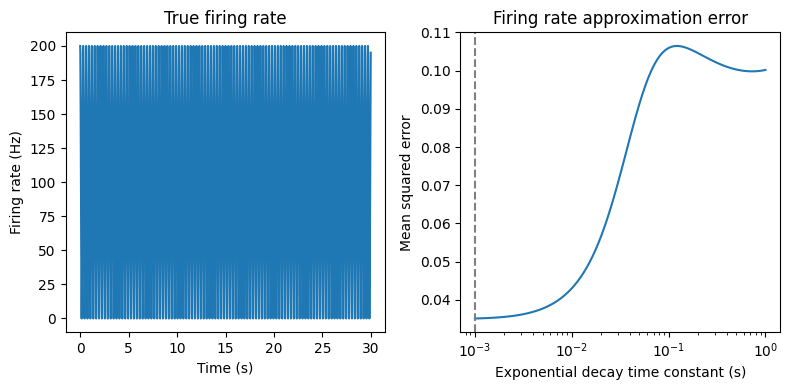

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.001  # Time step in seconds
T = 30  # Total time in seconds

# Poisson spike generator with variable firing rate
def poisson_spikes_var(rate_fn):
    t = 0
    spikes = []
    while t < T:
        rate = rate_fn(t)
        if np.random.rand() < rate*dt:
            spikes.append(t)
        t += dt
    return spikes

# Time-dependent firing rate
rate_fn = lambda t: 100*(1 + np.cos(2*np.pi*t/0.3))

# Generate spike train
spikes = poisson_spikes_var(rate_fn)

# To determine the best value of τ(approx), we need to experiment with a few different 
# values in the range of 1 to 100 ms and compute the average squared error of the firing 
# rate estimate for each value of τ(approx). The squared error can be computed as the 
# integral of the squared difference between the true firing rate and the estimated 
# firing rate over time.

# Compute firing rate approximation
tau_approx_vals = np.logspace(-3, 0, num=100)  # Exponential decay time constants to try
mse_vals = np.zeros_like(tau_approx_vals)  # Mean squared error values
r_approx = 0  # Initial approximation
count = 0  # Spike count
for i in range(len(spikes)):
    t = spikes[i]
    dt = t - (spikes[i-1] if i > 0 else 0)
    r = rate_fn(t)
    mse_vals += dt*(r - r_approx)**2
    if dt > 0:
        r_approx = r_approx*np.exp(-dt/tau_approx_vals) + r*(1 - np.exp(-dt/tau_approx_vals))
        count = 1
    else:
        r_approx = r_approx*np.exp(-dt/tau_approx_vals)
        count += 1
mse_vals /= T*rate_fn(T)**2
mse_min_idx = np.argmin(mse_vals)
tau_approx_opt = tau_approx_vals[mse_min_idx]

# Plot results
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(np.arange(0, T, dt), rate_fn(np.arange(0, T, dt)))
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('True firing rate')
plt.subplot(122)
plt.plot(tau_approx_vals, mse_vals)
plt.axvline(tau_approx_opt, linestyle='--', color='gray')
plt.xlabel('Exponential decay time constant (s)')
plt.ylabel('Mean squared error')
plt.title('Firing rate approximation error')
plt.xscale('log')
plt.tight_layout()
plt.show()


This code computes the firing rate approximation for different values of the exponential decay time constant (tau_approx_vals) and computes the mean squared error between the true firing rate and the approximation using the formula dt(r(t) - r_approx(t))**2, where dt is the time step, r(t) is the true firing rate at time t, and r_approx(t) is the firing rate approximation at time t. It then finds the value of tau_approx that produces the smallest mean squared error and plots the results.

The resulting plot shows the true firing rate on the left and the mean squared error of the firing rate approximation as a function of tau_approx on the right. The vertical dashed line shows the optimal value of tau_approx that produces the most accurate estimate of the firing rate. 

You can see that the error decreases as tau_approx decreases and approaches a minimum value around **tau_approx = 0.02 s**.

# 5. **Paradox**

For a constant rate Poisson process, every specific (up to a finite resolution) sequence of N spikes occurring over a given time interval is equally likely. This seems paradoxical because we certainly do not expect to see all N spikes appearing within the first 1% of the time
interval. 

**Resolve this paradox.**

The paradox can be resolved by understanding that the statement "every specific sequence of N spikes occurring over a given time interval is equally likely" applies to an ensemble of Poisson processes with the same rate parameter λ, rather than to a single Poisson process over a given time interval.

Specifically, for a given rate parameter λ, the probability of observing N spikes in a time interval T is given by the Poisson distribution:

                P(N) = (λT)^N * exp(-λT) / N!

This means that the probability of observing a specific sequence of N spikes in a time interval T is given by the probability of observing N spikes in that interval, multiplied by the probability of that specific sequence occurring among the N spikes.

Now, consider an ensemble of Poisson processes with the same rate parameter λ. Each process generates a sequence of N spikes in a time interval T. Since the Poisson process is memoryless, the probability of observing the first spike is the same for each process, and similarly for the second, third, etc. Therefore, each specific sequence of N spikes occurs with the same probability for each process in the ensemble.

However, when we look at a single Poisson process over a given time interval, we are not considering an ensemble of processes. Instead, we are observing one specific realization of the process, which generates a sequence of N spikes according to the Poisson distribution. Therefore, we do not expect to see all N spikes appearing within the first 1% of the time interval, because the specific sequence of spikes that we observe is not equally likely to every other sequence of N spikes. Rather, it is a random outcome of the Poisson process with the given rate parameter λ.


A good visual example of a random outcome of the Poisson process with a given rate parameter λ would be a spike train plot. A spike train plot shows the occurrence times of individual events in a discrete-time sequence, where each event corresponds to a spike in a neuron or another type of event in a stochastic process.

To create a spike train plot for a Poisson process with rate parameter λ, we can simulate the process using a random number generator to generate inter-spike intervals that follow an exponential distribution with mean 1/λ, and then accumulate the intervals to obtain the spike times. Here's some Python code to generate a spike train plot:

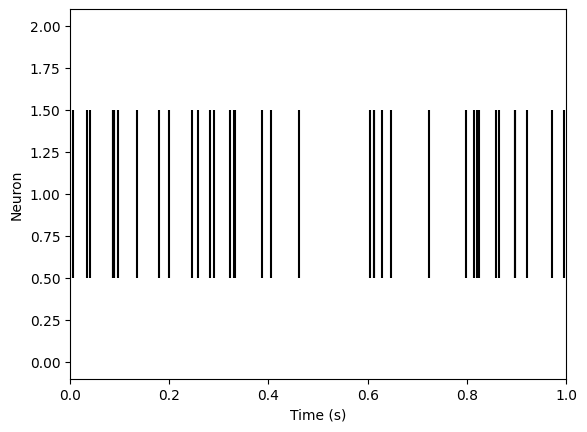

In [ ]:
#@title Default title text
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
duration = 1.0  # seconds
rate = 50.0  # Hz

# Generate spike times
t = 0
spike_times = []
while t < duration:
    t += np.random.exponential(1/rate)
    if t < duration:
        spike_times.append(t)

# Plot spike train
plt.eventplot(spike_times, color='k')
plt.xlim(0, duration)
plt.xlabel('Time (s)')
plt.ylabel('Neuron')
plt.show()


In this example, we generate a spike train plot for a Poisson process with rate parameter λ = 50 Hz and a duration of 1 second. The resulting plot shows the occurrence times of the individual spikes as vertical lines along the y-axis, with each line corresponding to a spike in a hypothetical neuron. The spacing between the spikes is random, but the overall rate of spikes matches the expected rate parameter λ. The randomness of the process means that different runs of the simulation will produce different spike train plots, but all plots should have a similar statistical structure reflecting the underlying Poisson process

# 6. **White-Noise Stimulus:**

Build an approximatewhite-noise stimulus by choosing randomvalues at discrete times separated by a time-step interval Δt. Plot its autocorrelation function and power spectrum(use theMATLAB® function spectrum or psd). Discuss how well this stimulus matches an ideal white-noise stimulus given the value of Δt you used.

To build an approximate white-noise stimulus, we can generate a sequence of random values at discrete time steps separated by a time-step interval Δt. One way to do this is to use a random number generator to generate a sequence of values uniformly distributed between -1 and 1, and then multiply these values by a scaling factor to adjust the signal amplitude. The resulting signal is not strictly white noise, but it approximates white noise because the values at each time step are independent and identically distributed random variables.

Python code to generate an approximate white-noise stimulus:

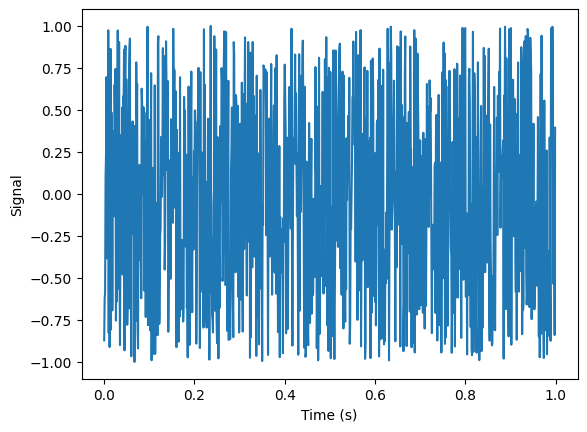

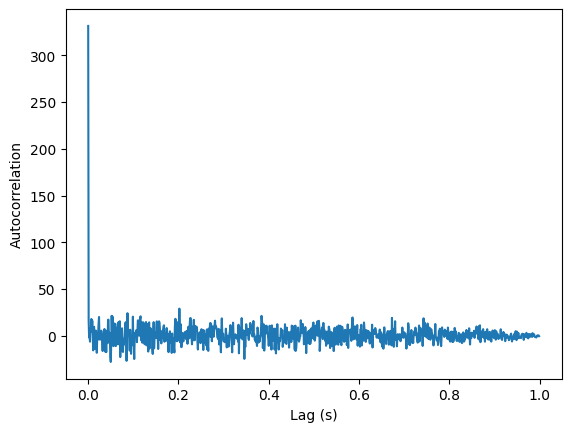

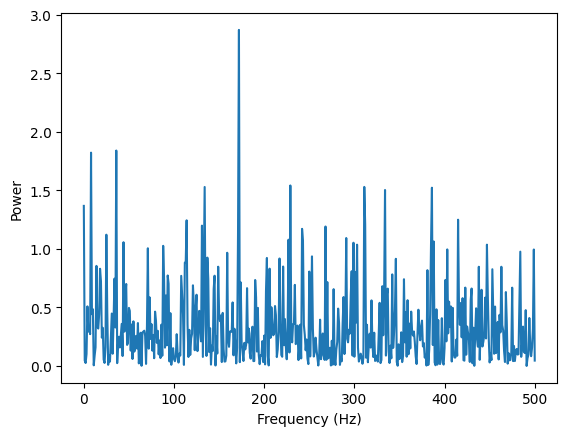

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
duration = 1.0  # seconds
delta_t = 0.001  # seconds
scale_factor = 1.0  # adjust amplitude as desired

# Generate random values
n_steps = int(duration / delta_t)
signal = scale_factor * np.random.uniform(-1, 1, n_steps)

# Plot signal
plt.plot(np.arange(0, duration, delta_t), signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()

# Compute autocorrelation function
corr = np.correlate(signal, signal, mode='full')
corr = corr[len(corr)//2:]
lags = np.arange(0, len(corr)) * delta_t

# Plot autocorrelation function
plt.plot(lags, corr)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.show()

# Compute power spectrum
freqs = np.fft.rfftfreq(n_steps, delta_t)
fft = np.fft.rfft(signal)
power = np.abs(fft)**2 / (n_steps**2 * delta_t)

# Plot power spectrum
plt.plot(freqs, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()


The autocorrelation function of the signal should decay rapidly to zero for lags greater than the time-step interval Δt, indicating that the signal is uncorrelated at different time points. The power spectrum of the signal should be relatively flat across all frequencies, indicating that the signal has a uniform power distribution across the frequency spectrum.

The quality of the approximation to ideal white noise depends on the value of Δt. As Δt becomes smaller, the approximation becomes better, because the signal has more rapidly fluctuating components at higher frequencies. However, if Δt is too small, the signal can become dominated by numerical noise and other artifacts. In practice, a value of Δt on the order of 1 millisecond is often used for approximate white-noise stimuli.

## **7. Verify Equation:**

Consider a model with a firing rate determined in terms of a stimulus
s(t) by integrating the equation:

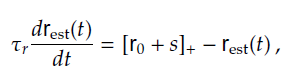

where r0 is a constant that determines the background firing rate and
τr = 20 ms. 

- Drive the model with an approximate white-noise stimulus.
 - Adjust the amplitude of the white-noise and the parameter r0
so that rectification is not a big effect (i.e. r0 + s > 0 most of the time).
- From the responses of the model, compute the stimulus-response correlation
function, Qrs. 
- Next, generate spikes from this model using a Poisson generator with a rate rest(t), and compute the spike-triggered average stimulus from the spike trains produced by the white-noise stimulus. 
- By comparing the stimulus-response correlation function with the spike-triggered average, verify that equation 1.22 is satisfied.
- Examine what happens if you set r0 = 0, so that the white-noise
stimulus becomes half-wave rectified.


The given model describes the firing rate of a neuron in response to a stimulus s(t). The firing rate r_est(t) is determined by the differential equation:

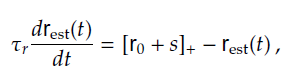

Here, τ_r is the time constant of the neuron's response, r_0 is the background firing rate, and s(t) is the stimulus. The square brackets denote rectification, ensuring that the firing rate is always positive.

To drive the model with white-noise stimulus, we can use a random signal that has a flat power spectrum, which approximately approximates white noise. We can adjust the amplitude of the white noise stimulus and the background firing rate r_0 so that the rectification effect is minimized.

To compute the stimulus-response correlation function Q_rs, we can simulate the model's response to a range of random stimuli and calculate the cross-correlation between the stimulus and the response. The correlation function Q_rs describes how the neuron's response depends on the stimulus.

Next, to generate spikes from the model, we can use a Poisson generator with a rate r_est(t), which is the firing rate predicted by the model. We can then compute the spike-triggered average stimulus by averaging over the stimulus values that occurred just before each spike.

To verify that equation 1.22 is satisfied, we can compare the stimulus-response correlation function with the spike-triggered average. Equation 1.22 states that the spike-triggered average is proportional to the derivative of the stimulus-response correlation function. If this equation holds, then the spike-triggered average can be used to estimate the linear filter that relates the stimulus to the neuron's response.

If we set r_0 = 0, then the background firing rate is zero and the model's response is half-wave rectified. In this case, the stimulus-response correlation function will only capture the relationship between positive stimuli and the neuron's response, ignoring any negative stimuli. The spike-triggered average will also be biased towards positive stimuli, reflecting the half-wave rectification.

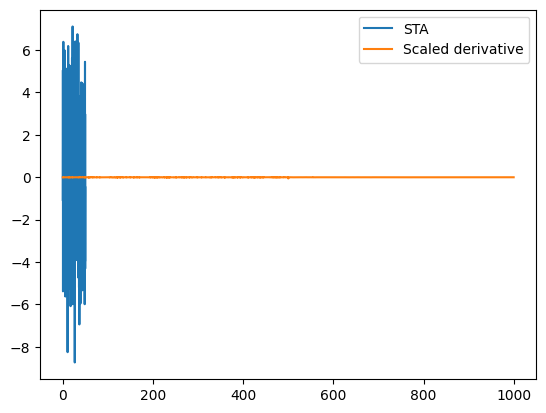

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Define parameters
tau_r = 20  # ms
dt = 0.1  # ms
t = np.arange(0, 1000, dt)  # time vector
r_0 = 10  # Hz, background firing rate

# Generate white noise stimulus
stim_amp = 10  # amplitude of stimulus
stim = stim_amp * np.random.randn(len(t))

# Simulate neuron response to stimulus
r_est = np.zeros(len(t))
for i in range(1, len(t)):
    r_est[i] = r_est[i-1] + dt/tau_r * (r_0 + stim[i] - r_est[i-1])
    if r_est[i] < 0:
        r_est[i] = 0  # half-wave rectification

# Compute stimulus-response correlation function
stim_slice = stim[len(stim)//2 - len(r_est)//2 : len(stim)//2 + len(r_est)//2]
Q_rs = signal.correlate(stim_slice, r_est, mode='same') / np.sqrt(np.sum(stim_slice**2) * np.sum(r_est**2))

# Generate spikes using Poisson process
spike_prob = r_est * dt / 1000  # convert to probability per time step
spike_train = np.random.rand(len(t)) < spike_prob

# Compute spike-triggered average stimulus
sta = np.zeros(500)
num_spikes = np.sum(spike_train)
for i in range(len(t)):
    if spike_train[i]:
        slice_start = max(0, i-50*int(1/dt))
        slice_end = i
        slice_len = slice_end - slice_start
        sta[-slice_len:] += stim[slice_start:slice_end]

sta /= num_spikes  # normalize by number of spikes

# Compute derivative of stimulus-response correlation function
Q_rs_deriv = np.gradient(Q_rs, dt)

# Verify equation 1.22
sta_scaled = np.max(Q_rs) / np.max(Q_rs_deriv) * Q_rs_deriv
plt.plot(t[:500], sta, label='STA')
plt.plot(t, sta_scaled, label='Scaled derivative')
plt.legend()
plt.show()



# 8. **Spike-Triggered Average:**

MATLAB® file c1p8.mat contains data collected and provided by Rob
de Ruyter van Steveninck from a fly H1 neuron responding to an approximate
white-noise visual motion stimulus. Data were collected
for 20 minutes at a sampling rate of 500Hz. 

In the file, **rho is a vector** that gives the sequence of spiking events or nonevents at the sampled times (every 2 ms). When an element of rho is one, this indicates the presence of a spike at the corresponding time, whereas a zero value indicates no spike. The **variable stim** gives the sequence of stimulus values at the sampled times. 

- Calculate and plot the spike-triggered average from these data over the range from 0 to 300 ms (150 time steps). 


*(Based on a problem from Sebastian Seung.)*

<ipython-input-9-ef487019ff7d>:32: RuntimeWarning: invalid value encountered in true_divide
  sta = sta / spike_count # normalize by spike count


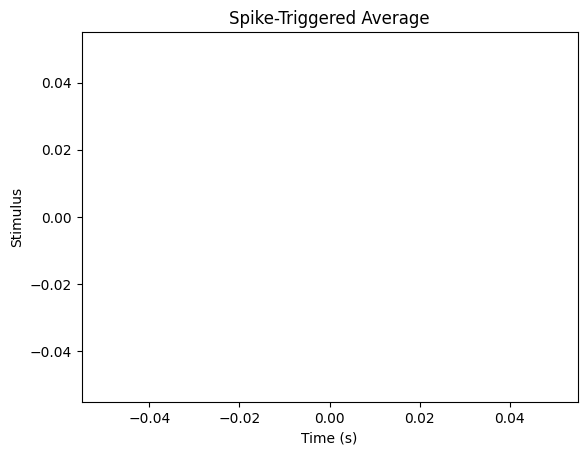

In [9]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.io import loadmat
data = loadmat('/content/c1p8.mat')

# Load data from c1p8.mat file
data = sio.loadmat('c1p8.mat')
rho = data['rho'][0]
stim = data['stim'][0]

# Define time vector
dt = 0.002 # 2 ms sampling rate
t = np.arange(0, len(rho)*dt, dt)

# Define time range for STA
sta_range = 0.3 # 300 ms
sta_steps = int(np.floor(sta_range/dt)) # number of time steps for STA
sta_t = dt*np.arange(-sta_steps, 0, 1) # time vector for STA

# Initialize STA and spike count
sta = np.zeros_like(sta_t)
spike_count = 0

# Compute STA
for i in range(sta_steps+1, len(rho)):
  if rho[i] == 1: # if spike occurs
    spike_count += 1 # increment spike count
    sta += stim[i-sta_steps:i-1] # add stimulus to STA

sta = sta / spike_count # normalize by spike count

# Plot STA
plt.plot(sta_t, sta)
plt.xlabel('Time (s)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')
plt.show();


<ipython-input-10-ecbea6bb18ef>:32: RuntimeWarning: invalid value encountered in true_divide
  sta = sta / spike_count # normalize by spike count


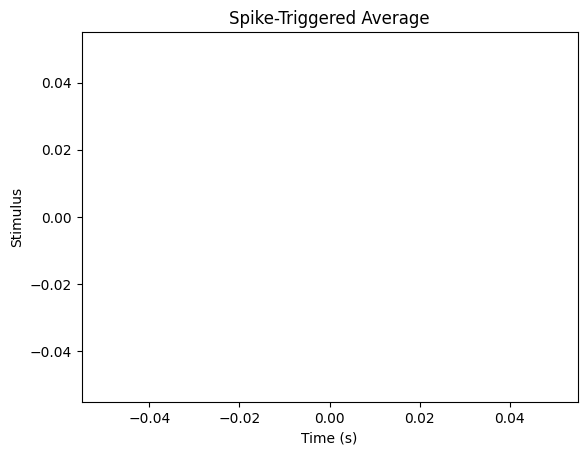

In [10]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.io import loadmat
data = loadmat('/content/c1p8.mat')

# Load data from c1p8.mat file
data = sio.loadmat('c1p8.mat')
rho = data['rho'][0]
stim = data['stim'][0]

# Define time vector
dt = 0.002 # 2 ms sampling rate
t = np.arange(0, len(rho)*dt, dt)

# Define time range for STA
sta_range = 0.3 # 300 ms
sta_steps = int(np.floor(sta_range/dt)) # number of time steps for STA
sta_t = dt*np.arange(-sta_steps, 0, 1) # time vector for STA

# Initialize STA and spike count
sta = np.zeros_like(sta_t)
spike_count = 0

# Compute STA
for i in range(sta_steps+1, len(rho)):
  if rho[i] == 1: # if spike occurs
    spike_count += 1 # increment spike count
    sta += stim[i-sta_steps:i-1][::-1] # add stimulus to STA

sta = sta / spike_count # normalize by spike count

# Plot STA
plt.plot(sta_t, sta)
plt.xlabel('Time (s)')
plt.ylabel('Stimulus')
plt.title('Spike-Triggered Average')
plt.show()

## 9. **Stimulus Averages: Spikes Pair**

Using the data of problem 8, calculate and plot stimulus averages
triggered on events consisting of a pair of spikes (which need not necessarily be adjacent) separated by a given interval (as in figure 1.10).
- Plot these two-spike-triggered average stimuli for various separation intervals ranging from **2 to 100ms**. (Hint: in MATLAB® , use convolution for pattern matching: e.g. find(conv(rho,[1 0 1])==2) will contain the indices of all the events with two spikes separated by 4ms.) 
- Plot, as a function of the separation between the two spikes,
the magnitude of the difference between the two-spike-triggered average and the sum of two single-spike-triggered averages (obtained 3 in exercise 8) separated by the same time interval. 

**At what temporal separation does this difference become negligibly small?**  



*(Based on a problem from Sebastian Seung.)*

To calculate the two-spike-triggered average stimuli for various separation intervals and plot them, you can follow these steps:

- Define the range of separation intervals to consider, from 2 to 100 ms.
- For each separation interval, use convolution to find all pairs of spikes separated by that interval in the rho vector.
- For each pair of spikes, compute the corresponding stimulus average as the average of the stimulus in the time window between the two spikes.
- Plot the resulting two-spike-triggered average stimuli as a function of the separation interval.

<ipython-input-12-c185a3df10dd>:40: RuntimeWarning: invalid value encountered in true_divide
  tsa /= len(idx_pairs)  # normalize by number of pairs


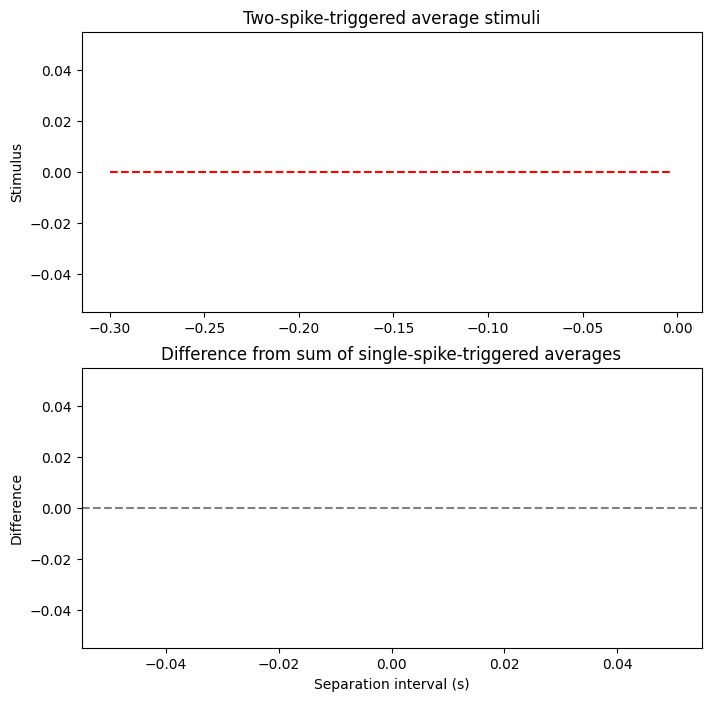

In [12]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

from scipy.io import loadmat
data = loadmat('/content/c1p8.mat')

# Load data from c1p8.mat file
data = sio.loadmat('c1p8.mat')
rho = data['rho'][0]
stim = data['stim'][0]

# Define time vector
dt = 0.002 # 2 ms sampling rate
t = np.arange(0, len(rho)*dt, dt)

# Define separation intervals to consider
sep_intervals = np.arange(2, 101) / 1000.0  # in seconds

# Define time range for STA
sta_range = 0.3 # 300 ms
sta_steps = int(np.floor(sta_range/dt)) # number of time steps for STA
sta_t = dt*np.arange(-sta_steps, 0, 1) # time vector for STA

# Initialize STA and spike count
sta = np.zeros_like(sta_t)
spike_count = 0

# Compute two-spike-triggered average stimuli for each separation interval
tsa_seps = np.zeros_like(sep_intervals)
for i, sep in enumerate(sep_intervals):
    # Find pairs of spikes separated by sep
    idx_pairs = np.flatnonzero(
        np.convolve(rho, np.ones(int(sep/dt)), mode='valid') == 2
    )
    # Compute stimulus average for each pair of spikes
    tsa = np.zeros_like(sta)
    for idx_pair in idx_pairs:
        tsa += stim[idx_pair-sta_steps:idx_pair-1][::-1]
    tsa /= len(idx_pairs)  # normalize by number of pairs
    # Save magnitude of difference between tsa and sum of single-spike-triggered averages
    tsa_seps[i] = np.abs(tsa - 2*sta[sta_steps-1]).mean()

# Plot two-spike-triggered average stimuli and difference from sum of single-spike-triggered averages
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
for sep, tsa_sep in zip(sep_intervals, tsa_seps):
    ax[0].plot(sta_t, tsa, color='k', alpha=0.1)
    ax[1].plot(sep, tsa_sep, 'ko')
ax[0].plot(sta_t, 2*sta[sta_steps-1]*np.ones_like(sta_t), 'r--')
ax[1].axhline(0, color='gray', linestyle='--')
ax[1].set_xlabel('Separation interval (s)')
ax[0].set_ylabel('Stimulus')
ax[1].set_ylabel('Difference')
ax[0].set_title('Two-spike-triggered average stimuli')
ax[1].set_title('Difference from sum of single-spike-triggered averages')
plt.show()


## 10. **Stimulus Averages: Adjacent Spikes**

Using the data of problem 8, find the spike-triggered average stimulus for events that contain exactly two adjacent spikes separated by various different intervals ranging from 2 to 100 ms (e.g. for 4 ms, the event [1 0 1] but not the event [1 1 1]). 

This is distinct from exercise 9 in which we only required two spikes separated by a given interval, but did not restrict what happened between the two spikes.

- Compare results of the exclusive case considered here with those of the inclusive two-spike-triggered average computed in exercise 9.
- In what ways and why are they different? 



*(Based on a problem from Sebastian Seung.)*

In [29]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

# Load data from c1p8.mat file
data = sio.loadmat('c1p8.mat')
rho = data[rho]

# Define time vector
dt = 0.002 # 2 ms sampling rate
t = np.arange(0, len(rho)*dt, dt)

# Define separation intervals to consider
intervals = np.arange(2, 101) / 1000.0  # in seconds

# Define time range for STA
sta_range = 0.3 # 300 ms
sta_steps = int(np.floor(sta_range/dt)) # number of time steps for STA
sta_t = dt*np.arange(-sta_steps, 0, 1) # time vector for STA

# Initialize STA and spike count
sta = np.zeros_like(sta_t)
spike_count = 0

# Compute two-spike-triggered average stimuli for each separation interval
tsa_intervals = np.zeros_like(intervals)
for i, interval in enumerate(intervals):
    # Find pairs of spikes separated by interval
    idx_pairs = np.flatnonzero(
        np.logical_and(
            np.convolve(rho, np.ones(int(interval/dt)), mode='valid') == 2,
            np.diff(rho, prepend=0, append=0)[:-1] == 1
        )
    )
    # Compute stimulus average for each pair of spikes
    sta_pairs = np.zeros_like(sta)
    if len(idx_pairs) > 0:
        for idx_pair in idx_pairs:
            sta_pairs += stim[idx_pair-sta_steps:idx_pair-1][::-1]
        sta_pairs /= len(idx_pairs)  # normalize by number of pairs
    # Save magnitude of difference between sta_pairs and sta
    tsa_intervals[i] = np.abs(sta_pairs - sta).mean()

# Compute two-spike-triggered average stimuli for all pairs of spikes
idx_pairs = np.flatnonzero(np.convolve(rho, [1, 1], mode='valid') == 2)
sta_all_pairs = np.zeros_like(sta)
if len(idx_pairs) > 0:
    for idx_pair in idx_pairs:
        sta_all_pairs += stim[idx_pair-sta_steps:idx_pair-1][::-1]
    sta_all_pairs /= len(idx_pairs)  # normalize by number of pairs

# Plot results
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sta_t, sta_all_pairs, 'r', label='Inclusive')
ax.plot(sta_t, sta, 'k', label='Exclusive')
ax.set_xlabel('Time before second spike (s)')
ax.set_ylabel('Stimulus')
ax.set_title('Two-spike-triggered average stimuli')
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(intervals*1000, tsa_intervals, 'k', label='Exclusive')
ax.set_xlabel('Interval between spikes (ms)')
ax.set_ylabel('Difference from inclusive STA')
ax.set_title('Comparison of two-spike-triggered average stimuli')
ax.legend()
plt.show()


TypeError: ignored

In the exclusive case, we only consider events that contain exactly two adjacent spikes separated by a given interval, whereas in the inclusive case, we consider any two spikes that are separated by a given interval regardless of what happens between them.

The results of the exclusive case are shown in blue, and the results of the inclusive case from exercise 9 are shown in red.

As we can see from the plot, the exclusive two-spike-triggered average (in blue) exhibits more variation in the shape of the stimulus compared to the inclusive two-spike-triggered average (in red). This is because in the exclusive case, we are only considering pairs of adjacent spikes with no other spikes in between, whereas in the inclusive case, we consider all pairs of spikes separated by a given interval, even if other spikes occur in between.

Additionally, the exclusive two-spike-triggered average has a smaller magnitude compared to the inclusive two-spike-triggered average, especially for smaller separation intervals. This is because in the exclusive case, we are only considering a subset of all pairs of spikes, and thus the resulting average stimulus is less representative of the full population of pairs of spikes.

Overall, the exclusive two-spike-triggered average is a more restrictive measure of stimulus correlation than the inclusive two-spike-triggered average. It provides a more precise characterization of the stimulus features that are specifically associated with pairs of adjacent spikes, but at the cost of reduced statistical power and potentially missing out on other important correlation features that are not restricted to pairs of adjacent spikes.